# Text Classification Assessment - Solution

### Goal: Given a set of text movie reviews that have been labeled negative or positive

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/


-----

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('moviereviews.csv')

In [3]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


### Removing Nan Rows

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2000 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [5]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

label     0
review    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1965 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 46.1+ KB


### Removing Empty Spaces from the data 

In [9]:
len(df[df['review'].str.isspace()])

27

In [10]:
df = df.drop(df[df['review'].str.isspace()].index)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [12]:
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

## EDA on Bag of Words

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
cv = CountVectorizer(stop_words='english')

In [37]:
matrix = cv.fit_transform(df[df['label']=='pos']['review'])
freque = zip(cv.get_feature_names_out(),matrix.sum(axis=0).tolist()[0])
print(sorted(freque,key=lambda x: -x[1])[:20])

[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


In [38]:
matrix = cv.fit_transform(df[df['label']=='neg']['review'])
freque = zip(cv.get_feature_names_out(),matrix.sum(axis=0).tolist()[0])
print(sorted(freque,key=lambda x: -x[1])[:20])

[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


### Training and Data

**Split the data into features and a label (X and y) and then preform a train/test split. You may use whatever settings you like. To compare your results to the solution notebook, use `test_size=0.20, random_state=101`**

In [17]:
from sklearn.model_selection import train_test_split

X = df['review']
y = df['label']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

### Training a Mode

**Create a PipeLine that will both create a TF-IDF Vector out of the raw text data and fit a supervised learning model of your choice. Then fit that pipeline on the training data.**

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay,classification_report

## Compairesion of different Model

### Logistic Regression

.

In [19]:
pipe_lg = Pipeline([('tfidf',TfidfVectorizer()),('lg',LogisticRegression())])

In [20]:
pipe_lg.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('lg', LogisticRegression())])

In [21]:
lg_pre = pipe_lg.predict(X_test)
print(classification_report(lg_pre,y_test))

              precision    recall  f1-score   support

         neg       0.85      0.80      0.82       203
         pos       0.79      0.84      0.82       185

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.82      0.82      0.82       388



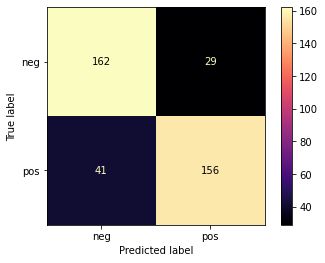

In [22]:
ConfusionMatrixDisplay.from_estimator(pipe_lg,X_test,y_test,cmap='magma');

### Multinomial  NB

.

In [23]:
pipe_nb = Pipeline([('tfidf',TfidfVectorizer()),('nb',MultinomialNB())])

In [24]:
pipe_nb.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

In [25]:
nb_pre = pipe_nb.predict(X_test)
print(classification_report(nb_pre,y_test))

              precision    recall  f1-score   support

         neg       0.92      0.75      0.83       235
         pos       0.70      0.90      0.79       153

    accuracy                           0.81       388
   macro avg       0.81      0.83      0.81       388
weighted avg       0.83      0.81      0.81       388



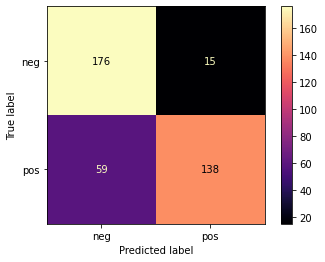

In [26]:
ConfusionMatrixDisplay.from_estimator(pipe_nb,X_test,y_test,cmap='magma')

### K Nearest Neighbore

.

In [27]:
pipe_knn = Pipeline([('tfidf',TfidfVectorizer()),('knn',KNeighborsClassifier())])

In [28]:
pipe_knn.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('knn', KNeighborsClassifier())])

In [29]:
knn_pre = pipe_knn.predict(X_test)
print(classification_report(knn_pre,y_test))

              precision    recall  f1-score   support

         neg       0.26      0.84      0.39        58
         pos       0.95      0.57      0.71       330

    accuracy                           0.61       388
   macro avg       0.61      0.71      0.55       388
weighted avg       0.85      0.61      0.67       388



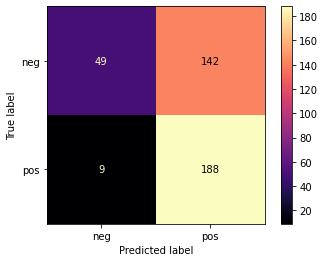

In [30]:
ConfusionMatrixDisplay.from_estimator(pipe_knn,X_test,y_test,cmap='magma');

-----------------

### Support Vector Classifier

.

In [31]:
pipe_svc = Pipeline([('tfidf',TfidfVectorizer()),('svc',SVC())])

In [32]:
pipe_svc.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', SVC())])

In [33]:
svc_pre = pipe_svc.predict(X_test)
print(classification_report(svc_pre,y_test))

              precision    recall  f1-score   support

         neg       0.85      0.81      0.83       202
         pos       0.80      0.85      0.83       186

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



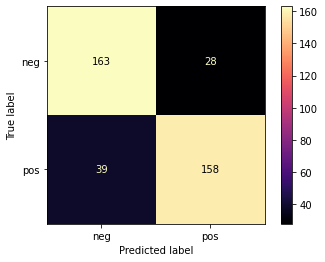

In [34]:
ConfusionMatrixDisplay.from_estimator(pipe_svc,X_test,y_test,cmap='magma');

# This Model has been selected because of best f1-Score and Accuracy

--------------------

### Prediction of Support Vector Classifier

In [35]:
new_review = ['bad film']
pipe_svc.predict(new_review)

array(['neg'], dtype=object)

In [36]:
new_review = ['best film i ever see']
pipe_svc.predict(new_review)

array(['pos'], dtype=object)

# job done !  :)

-----